In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install openpyxl

In [209]:
# reading the traininf data shared
df_train=pd.read_csv("Train.csv", index_col=[0])
df_test=pd.read_excel("test.xlsx", index_col=[0])
test_data = pd.read_excel('test.xlsx') # backup
#setting option for displaying only 35 columns
pd.set_option("display.max_columns", 35)

#Overview of the data
df_train.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price,
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,t,t,NaN,3/26/2012,f,7/18/2016,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.010635,NaN
6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,t,f,100%,6/19/2017,t,9/23/2017,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,5.129899,NaN
7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,t,100%,10/25/2016,t,9/14/2017,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,4.976734,NaN
13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,4/19/2015,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,6.620073,NaN
3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",5/12/2015,t,t,100%,3/1/2015,t,1/22/2017,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,4.744932,NaN


In [4]:
df_test.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5979389,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,NYC,2 bedroom apartment 3 blocks away from the Dek...,NaT,t,t,1.0,2015-05-29,f,NaT,40.705948,-73.915318,Bedroom in Renovated Apartment with Washer/Dryer,Ridgewood,0,NaN,https://a0.muscache.com/im/pictures/b43127ee-b...,11385,1.0,1.0,NaN
13488121,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,LA,This 2015 renovation was done with an eye to b...,2015-11-16,t,t,1.0,2015-08-17,f,2017-04-23,34.118408,-118.317929,Peaceful and Quiet Hollywood Hills,Hollywood Hills,24,100.0,https://a0.muscache.com/im/pictures/894d8ca5-7...,90068,1.0,1.0,NaN
8121643,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,NYC,Apt features shared living room w/ Apple TV. ...,NaT,t,f,NaN,2012-06-18,f,NaT,40.707888,-74.015211,"Luxury, doorman Building- FIDI",Financial District,0,NaN,NaN,10006,1.0,1.0,NaN
16490010,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,NYC,Our home is equidistance to the L and G trains...,2016-09-29,t,t,1.0,2011-12-12,f,2017-09-24,40.721388,-73.945642,Cozy room in sunny historic Greenpoint home,Greenpoint,12,98.0,https://a0.muscache.com/im/pictures/6c99615c-4...,11222,1.0,1.0,NaN
16274069,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,True,NYC,JUST 20 MINUTES BY TRAIN TO MANHATTAN - AFFORD...,2015-01-05,t,f,1.0,2014-11-02,f,2017-09-14,40.682556,-73.943259,B's Suite,Bedford-Stuyvesant,13,92.0,https://a0.muscache.com/im/pictures/56275358/c...,11216,2.0,3.0,NaN


In [5]:
df_train.columns

Index(['property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price', ' '],
      dtype='object')

In [6]:
df_test.columns

Index(['property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', ' '],
      dtype='object')

In [206]:
print(type(test_data))

<class 'pandas.core.frame.DataFrame'>


In [213]:
test_data.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', ' '],
      dtype='object')

In [207]:
test_data.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5979389,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,NYC,2 bedroom apartment 3 blocks away from the Dek...,NaT,t,t,1.0,2015-05-29,f,NaT,40.705948,-73.915318,Bedroom in Renovated Apartment with Washer/Dryer,Ridgewood,0,NaN,https://a0.muscache.com/im/pictures/b43127ee-b...,11385,1.0,1.0,NaN
13488121,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,LA,This 2015 renovation was done with an eye to b...,2015-11-16,t,t,1.0,2015-08-17,f,2017-04-23,34.118408,-118.317929,Peaceful and Quiet Hollywood Hills,Hollywood Hills,24,100.0,https://a0.muscache.com/im/pictures/894d8ca5-7...,90068,1.0,1.0,NaN
8121643,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,NYC,Apt features shared living room w/ Apple TV. ...,NaT,t,f,NaN,2012-06-18,f,NaT,40.707888,-74.015211,"Luxury, doorman Building- FIDI",Financial District,0,NaN,NaN,10006,1.0,1.0,NaN
16490010,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,NYC,Our home is equidistance to the L and G trains...,2016-09-29,t,t,1.0,2011-12-12,f,2017-09-24,40.721388,-73.945642,Cozy room in sunny historic Greenpoint home,Greenpoint,12,98.0,https://a0.muscache.com/im/pictures/6c99615c-4...,11222,1.0,1.0,NaN
16274069,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,True,NYC,JUST 20 MINUTES BY TRAIN TO MANHATTAN - AFFORD...,2015-01-05,t,f,1.0,2014-11-02,f,2017-09-14,40.682556,-73.943259,B's Suite,Bedford-Stuyvesant,13,92.0,https://a0.muscache.com/im/pictures/56275358/c...,11216,2.0,3.0,NaN


In [7]:
df_train.drop(df_train.columns[-1], axis=1, inplace=True)

In [8]:
df_test.drop(df_test.columns[-1], axis=1, inplace=True)

In [9]:
#Overview of the column types and NaN values present in each of the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 6901257 to 10519192
Data columns (total 28 columns):
property_type             49999 non-null object
room_type                 49999 non-null object
amenities                 49999 non-null object
accommodates              49999 non-null int64
bathrooms                 49853 non-null float64
bed_type                  49999 non-null object
cancellation_policy       49999 non-null object
cleaning_fee              49999 non-null bool
city                      49999 non-null object
description               49999 non-null object
first_review              39288 non-null object
host_has_profile_pic      49872 non-null object
host_identity_verified    49872 non-null object
host_response_rate        37661 non-null object
host_since                49872 non-null object
instant_bookable          49999 non-null object
last_review               39316 non-null object
latitude                  49999 non-null float64
longitude          

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24111 entries, 5979389 to 3534845
Data columns (total 27 columns):
property_type             24111 non-null object
room_type                 24111 non-null object
amenities                 24111 non-null object
accommodates              24111 non-null int64
bathrooms                 24057 non-null float64
bed_type                  24111 non-null object
cancellation_policy       24111 non-null object
cleaning_fee              24111 non-null bool
city                      24111 non-null object
description               24110 non-null object
first_review              18958 non-null datetime64[ns]
host_has_profile_pic      24050 non-null object
host_identity_verified    24050 non-null object
host_response_rate        18150 non-null float64
host_since                24050 non-null datetime64[ns]
instant_bookable          24111 non-null object
last_review               18967 non-null datetime64[ns]
latitude                  24111 non-null flo

In [11]:
#Dropping Latitude and longitude and zipcode as we already have City details available to us
#dropping "host_has_profile_pic" and "thumbnail_url" columns as these are not significant contributor towards predicting the teraget variable
df_train=df_train.drop(['host_has_profile_pic','latitude','longitude','thumbnail_url', 'name','zipcode'], axis=1)

In [12]:
#Dropping Latitude and longitude and zipcode as we already have City details available to us
#dropping "host_has_profile_pic" and "thumbnail_url" columns as these are not significant contributor towards predicting the teraget variable
df_test=df_test.drop(['host_has_profile_pic','latitude','longitude','thumbnail_url', 'name','zipcode'], axis=1)

In [13]:
df_train['first_review']=df_train['first_review'].astype('object')
df_test['first_review']=df_test['first_review'].astype('object')

In [14]:
df_train['host_since']=df_train['host_since'].astype('object')
df_test['host_since']=df_test['host_since'].astype('object')

In [15]:
df_train['last_review']=df_train['last_review'].astype('object')
df_test['last_review']=df_test['last_review'].astype('object')

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24111 entries, 5979389 to 3534845
Data columns (total 21 columns):
property_type             24111 non-null object
room_type                 24111 non-null object
amenities                 24111 non-null object
accommodates              24111 non-null int64
bathrooms                 24057 non-null float64
bed_type                  24111 non-null object
cancellation_policy       24111 non-null object
cleaning_fee              24111 non-null bool
city                      24111 non-null object
description               24110 non-null object
first_review              18958 non-null object
host_identity_verified    24050 non-null object
host_response_rate        18150 non-null float64
host_since                24050 non-null object
instant_bookable          24111 non-null object
last_review               18967 non-null object
neighbourhood             21856 non-null object
number_of_reviews         24111 non-null int64
review_scores_rating 

In [17]:
#for train data
#extracting the numerical and categorica columns
num_cols=df_train.select_dtypes(exclude='object').columns
cat_cols=df_train.select_dtypes(include='object').columns

#filling the missing values with "mode" (for categorical features)
#filling the missing values with "median" (for numerical values)

df_train[cat_cols]=df_train[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))
df_train[num_cols]=df_train[num_cols].apply(lambda col: col.fillna(col.median()))

In [18]:
#for test data
#extracting the numerical and categorica columns
num_cols_test=df_test.select_dtypes(exclude='object').columns
cat_cols_test=df_test.select_dtypes(include='object').columns

#filling the missing values with "mode" (for categorical features)
#filling the missing values with "median" (for numerical values)

df_test[cat_cols_test]=df_test[cat_cols_test].apply(lambda col: col.fillna(col.mode()[0]))
df_test[num_cols_test]=df_test[num_cols_test].apply(lambda col: col.fillna(col.median()))

In [19]:
df_train.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
id,,,,,,,,,,,,,,,,,,,,,,
6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,t,100%,3/26/2012,f,7/18/2016,Brooklyn Heights,2,100.0,1.0,1.0,5.010635
6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,f,100%,6/19/2017,t,9/23/2017,Hell's Kitchen,6,93.0,3.0,3.0,5.129899
7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,100%,10/25/2016,t,9/14/2017,Harlem,10,92.0,1.0,3.0,4.976734
13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,1/1/2017,t,100%,4/19/2015,f,4/30/2017,Lower Haight,0,96.0,2.0,2.0,6.620073
3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",5/12/2015,t,100%,3/1/2015,t,1/22/2017,Columbia Heights,4,40.0,0.0,1.0,4.744932


In [20]:
df_test.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
5979389,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,NYC,2 bedroom apartment 3 blocks away from the Dek...,2017-01-01,t,1.0,2015-05-29,f,2017-04-30,Ridgewood,0,96.0,1.0,1.0
13488121,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,LA,This 2015 renovation was done with an eye to b...,2015-11-16,t,1.0,2015-08-17,f,2017-04-23,Hollywood Hills,24,100.0,1.0,1.0
8121643,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,NYC,Apt features shared living room w/ Apple TV. ...,2017-01-01,f,1.0,2012-06-18,f,2017-04-30,Financial District,0,96.0,1.0,1.0
16490010,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,NYC,Our home is equidistance to the L and G trains...,2016-09-29,t,1.0,2011-12-12,f,2017-09-24,Greenpoint,12,98.0,1.0,1.0
16274069,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,True,NYC,JUST 20 MINUTES BY TRAIN TO MANHATTAN - AFFORD...,2015-01-05,f,1.0,2014-11-02,f,2017-09-14,Bedford-Stuyvesant,13,92.0,2.0,3.0


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 6901257 to 10519192
Data columns (total 22 columns):
property_type             49999 non-null object
room_type                 49999 non-null object
amenities                 49999 non-null object
accommodates              49999 non-null int64
bathrooms                 49999 non-null float64
bed_type                  49999 non-null object
cancellation_policy       49999 non-null object
cleaning_fee              49999 non-null bool
city                      49999 non-null object
description               49999 non-null object
first_review              49999 non-null object
host_identity_verified    49999 non-null object
host_response_rate        49999 non-null object
host_since                49999 non-null object
instant_bookable          49999 non-null object
last_review               49999 non-null object
neighbourhood             49999 non-null object
number_of_reviews         49999 non-null int64
review_scores_rating 

### Preprocessing of "property_type" column

In [22]:
#for train dataset
#looking at the unique values in "property_type" column
df_train['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House',
       'Parking Space', 'Train', 'Cave', 'Lighthouse'], dtype=object)

In [23]:
#for test dataset
#looking at the unique values in "property_type" column
df_test['property_type'].unique()

array(['Apartment', 'House', 'Other', 'Townhouse', 'Camper/RV',
       'Bed & Breakfast', 'Guesthouse', 'Condominium', 'Timeshare',
       'Loft', 'Boat', 'Bungalow', 'Villa', 'Hostel', 'In-law',
       'Earth House', 'Train', 'Guest suite', 'Cabin', 'Tipi', 'Chalet',
       'Dorm', 'Boutique hotel', 'Hut', 'Yurt', 'Serviced apartment',
       'Castle', 'Vacation home', 'Tent', 'Cave', 'Island', 'Treehouse'],
      dtype=object)

In [24]:
#Creating dummy variables out of "property_type" column for train dataset
df_train_property_dummy=pd.get_dummies(df_train.property_type, prefix="property_type")

In [25]:
#Creating dummy variables out of "property_type" column, for test dataset
df_test_property_dummy=pd.get_dummies(df_test.property_type, prefix="property_type")

In [26]:
#concatinating the dummy variables and the original dataframe (for train dataset)
df_train=pd.concat([df_train, df_train_property_dummy], axis=1)

In [27]:
#concatinating the dummy variables and the original dataframe (for test dataset)
df_test=pd.concat([df_test, df_test_property_dummy], axis=1)

In [28]:
#dropping the orginal "property_type" column (for test dataset)
df_train.drop("property_type", axis=1, inplace=True)
df_test.drop("property_type", axis=1, inplace=True)

### Preprocessing of "room_type" column

In [29]:
#looking at the unique values in "room_type" column for train data set
df_train["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [30]:
#looking at the unique values in "room_type" column for test data set
df_test["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [31]:
#Looking at the counts for each categories of room_type for train dataset
df_train["room_type"].value_counts()

Entire home/apt    27905
Private room       20658
Shared room         1436
Name: room_type, dtype: int64

In [32]:
#Looking at the counts for each categories of room_type for test dataset
df_test["room_type"].value_counts()

Entire home/apt    13405
Private room        9980
Shared room          726
Name: room_type, dtype: int64

In [33]:
#for training data set
#Executing label encoding on "room_type" column, to convert it into integer type column and to use it in our modelling
#importing the required module for labelEncoding
from sklearn.preprocessing import LabelEncoder
le_train_room_type=LabelEncoder()
df_train['room_type']=le_train_room_type.fit_transform(df_train['room_type'])

In [34]:
#for test dataset
#Executing label encoding on "room_type" column, to convert it into integer type column and to use it in our modelling
#importing the required module for labelEncoding
df_test['room_type']=le_train_room_type.transform(df_test['room_type'])

### Processing of amenities column

In [35]:
#for training data
from collections import Counter
results = Counter()
df_train['amenities'].str.strip('{}').str.replace('"','').str.lstrip('\"').str.rstrip('\"').str.split(',').apply(results.update)

results.most_common(50)

[('Wireless Internet', 48055),
 ('Kitchen', 45598),
 ('Heating', 45231),
 ('Essentials', 43171),
 ('Smoke detector', 41545),
 ('Air conditioning', 37252),
 ('TV', 35313),
 ('Shampoo', 33372),
 ('Hangers', 33224),
 ('Carbon monoxide detector', 31735),
 ('Internet', 30040),
 ('Laptop friendly workspace', 29531),
 ('Hair dryer', 29294),
 ('Washer', 29017),
 ('Dryer', 28744),
 ('Iron', 28134),
 ('Family/kid friendly', 24837),
 ('Fire extinguisher', 20659),
 ('First aid kit', 18587),
 ('translation missing: en.hosting_amenity_50', 17152),
 ('Cable TV', 16265),
 ('Free parking on premises', 15958),
 ('translation missing: en.hosting_amenity_49', 13853),
 ('24-hour check-in', 12798),
 ('Lock on bedroom door', 12075),
 ('Buzzer/wireless intercom', 11393),
 ('Safety card', 7710),
 ('Self Check-In', 7417),
 ('Elevator', 7285),
 ('Pets allowed', 6811),
 ('Pets live on this property', 6537),
 ('Indoor fireplace', 6305),
 ('Breakfast', 5592),
 ('Gym', 5040),
 ('Private entrance', 4893),
 ('Elevator

In [36]:
#for test data
from collections import Counter
results1 = Counter()
df_test['amenities'].str.strip('{}').str.replace('"','').str.lstrip('\"').str.rstrip('\"').str.split(',').apply(results1.update)

results1.most_common(50)

[('Wireless Internet', 23209),
 ('Kitchen', 21927),
 ('Heating', 21841),
 ('Essentials', 20834),
 ('Smoke detector', 20181),
 ('Air conditioning', 17957),
 ('TV', 17144),
 ('Shampoo', 16093),
 ('Hangers', 15949),
 ('Carbon monoxide detector', 15454),
 ('Internet', 14608),
 ('Laptop friendly workspace', 14172),
 ('Washer', 14152),
 ('Hair dryer', 14036),
 ('Dryer', 13967),
 ('Iron', 13552),
 ('Family/kid friendly', 12189),
 ('Fire extinguisher', 10065),
 ('First aid kit', 8945),
 ('translation missing: en.hosting_amenity_50', 8139),
 ('Cable TV', 7988),
 ('Free parking on premises', 7681),
 ('translation missing: en.hosting_amenity_49', 6574),
 ('24-hour check-in', 6217),
 ('Lock on bedroom door', 5908),
 ('Buzzer/wireless intercom', 5639),
 ('Safety card', 3803),
 ('Self Check-In', 3624),
 ('Elevator', 3534),
 ('Pets allowed', 3386),
 ('Pets live on this property', 3193),
 ('Indoor fireplace', 2994),
 ('Breakfast', 2714),
 ('Gym', 2451),
 ('Private entrance', 2377),
 ('Hot tub', 2048),

In [37]:
#creating a new dataframe (train data)
df_train_amenities=pd.DataFrame(results.most_common(30), columns=['amenity','count'])
df_train_amenities.head()

,amenity,count
0,Wireless Internet,48055
1,Kitchen,45598
2,Heating,45231
3,Essentials,43171
4,Smoke detector,41545


In [38]:
#creating a new dataframe (test data)
df_test_amenities=pd.DataFrame(results1.most_common(30), columns=['amenity','count'])
df_test_amenities.head()

,amenity,count
0,Wireless Internet,23209
1,Kitchen,21927
2,Heating,21841
3,Essentials,20834
4,Smoke detector,20181


Text(0.5, 0, 'Count')

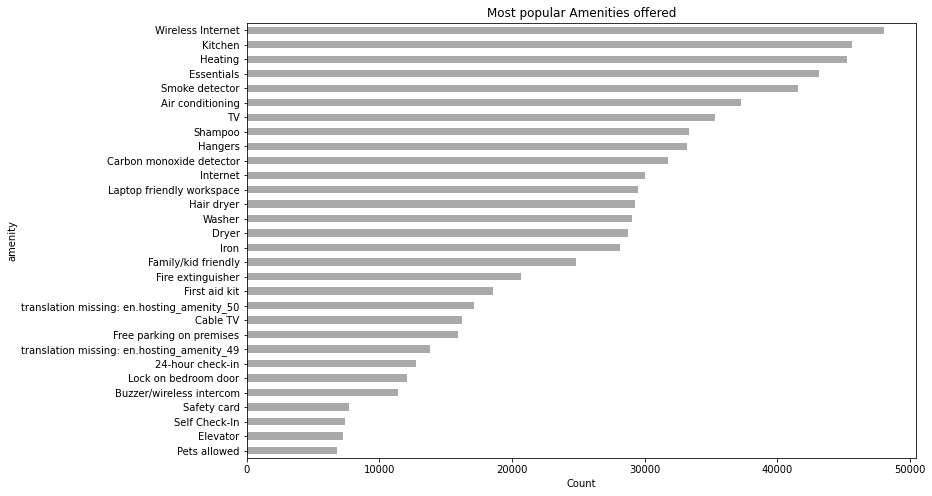

In [39]:
#plotting top 30
df_train_amenities.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count', figsize=(12,8), legend=False, color="darkgrey", title="Most popular Amenities offered")
plt.xlabel('Count')

Text(0.5, 0, 'Count')

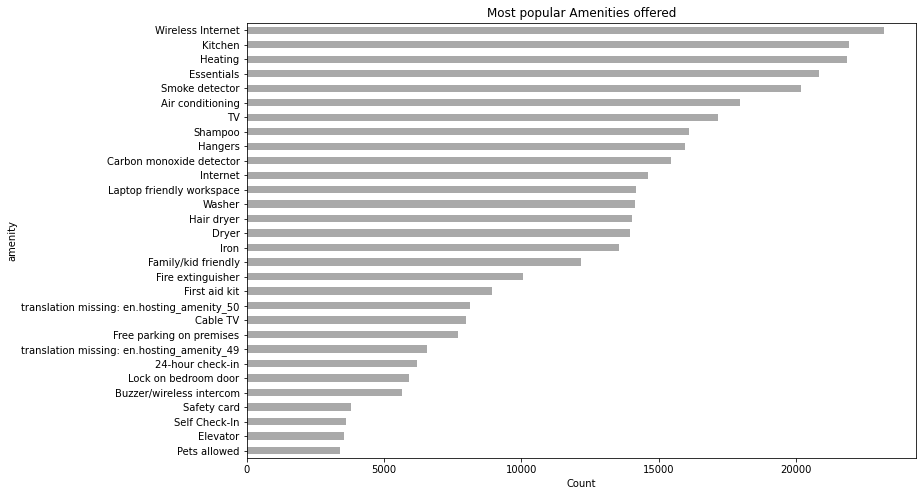

In [40]:
#plotting top 30 for test dataset
df_test_amenities.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count', figsize=(12,8), legend=False, color="darkgrey", title="Most popular Amenities offered")
plt.xlabel('Count')

In [41]:
#creating a boolean column after each of the 30 amenities we got from the above analysis
for i in df_train_amenities['amenity']:
    df_train[i]=df_train['amenities'].str.contains(i)

In [42]:
df_train.head()

,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,neighbourhood,number_of_reviews,...,Washer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,translation missing: en.hosting_amenity_50,Cable TV,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6901257,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,t,100%,3/26/2012,f,7/18/2016,Brooklyn Heights,2,...,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False
6304928,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,f,100%,6/19/2017,t,9/23/2017,Hell's Kitchen,6,...,True,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False
7919400,0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,100%,10/25/2016,t,9/14/2017,Harlem,10,...,False,False,True,True,True,False,True,True,False,False,False,False,True,False,False,False,False
13418779,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,1/1/2017,t,100%,4/19/2015,f,4/30/2017,Lower Haight,0,...,True,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False
3808709,0,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",5/12/2015,t,100%,3/1/2015,t,1/22/2017,Columbia Heights,4,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [43]:
#creating a boolean column after each of the 30 amenities we got from the above analysis (for test dataset)
for i in df_test_amenities['amenity']:
    df_test[i]=df_test['amenities'].str.contains(i)

In [44]:
df_test.head()

,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,neighbourhood,number_of_reviews,...,Hair dryer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,translation missing: en.hosting_amenity_50,Cable TV,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5979389,1,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,NYC,2 bedroom apartment 3 blocks away from the Dek...,2017-01-01,t,1.0,2015-05-29,f,2017-04-30,Ridgewood,0,...,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
13488121,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,LA,This 2015 renovation was done with an eye to b...,2015-11-16,t,1.0,2015-08-17,f,2017-04-23,Hollywood Hills,24,...,True,True,True,True,True,False,True,True,True,False,True,False,False,True,False,False,False
8121643,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,NYC,Apt features shared living room w/ Apple TV. ...,2017-01-01,f,1.0,2012-06-18,f,2017-04-30,Financial District,0,...,True,True,True,True,True,True,False,True,False,False,True,True,False,False,False,True,False
16490010,1,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,NYC,Our home is equidistance to the L and G trains...,2016-09-29,t,1.0,2011-12-12,f,2017-09-24,Greenpoint,12,...,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False
16274069,0,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,True,NYC,JUST 20 MINUTES BY TRAIN TO MANHATTAN - AFFORD...,2015-01-05,f,1.0,2014-11-02,f,2017-09-14,Bedford-Stuyvesant,13,...,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False


In [45]:
#dropping the column "amenities" as we have label encoded the same ((train data)
df_train.drop("amenities", axis=1, inplace=True)

In [46]:
#dropping the column "amenities" as we have label encoded the same (test data)
df_test.drop("amenities", axis=1, inplace=True)

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 6901257 to 10519192
Data columns (total 84 columns):
room_type                                     49999 non-null int32
accommodates                                  49999 non-null int64
bathrooms                                     49999 non-null float64
bed_type                                      49999 non-null object
cancellation_policy                           49999 non-null object
cleaning_fee                                  49999 non-null bool
city                                          49999 non-null object
description                                   49999 non-null object
first_review                                  49999 non-null object
host_identity_verified                        49999 non-null object
host_response_rate                            49999 non-null object
host_since                                    49999 non-null object
instant_bookable                              49999 non-null object
l

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24111 entries, 5979389 to 3534845
Data columns (total 81 columns):
room_type                                     24111 non-null int32
accommodates                                  24111 non-null int64
bathrooms                                     24111 non-null float64
bed_type                                      24111 non-null object
cancellation_policy                           24111 non-null object
cleaning_fee                                  24111 non-null bool
city                                          24111 non-null object
description                                   24111 non-null object
first_review                                  24111 non-null datetime64[ns]
host_identity_verified                        24111 non-null object
host_response_rate                            24111 non-null float64
host_since                                    24111 non-null datetime64[ns]
instant_bookable                              24111 n

In [49]:
#converting all the 't' to 1 and 'f' to 0
for column in df_train.columns:
    if df_train[column].dtype==bool:
        df_train[column]=df_train[column]*1

In [50]:
df_train.head()

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,neighbourhood,number_of_reviews,review_scores_rating,...,Washer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,translation missing: en.hosting_amenity_50,Cable TV,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6901257,0,3,1.0,Real Bed,strict,1,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,t,100%,3/26/2012,f,7/18/2016,Brooklyn Heights,2,100.0,...,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
6304928,0,7,1.0,Real Bed,strict,1,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,f,100%,6/19/2017,t,9/23/2017,Hell's Kitchen,6,93.0,...,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
7919400,0,5,1.0,Real Bed,moderate,1,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,100%,10/25/2016,t,9/14/2017,Harlem,10,92.0,...,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0
13418779,0,4,1.0,Real Bed,flexible,1,SF,This light-filled home-away-from-home is super...,1/1/2017,t,100%,4/19/2015,f,4/30/2017,Lower Haight,0,96.0,...,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0
3808709,0,2,1.0,Real Bed,moderate,1,DC,"Cool, cozy, and comfortable studio located in ...",5/12/2015,t,100%,3/1/2015,t,1/22/2017,Columbia Heights,4,40.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [51]:
#converting all the 't' to 1 and 'f' to 0 (for test data)
for column in df_test.columns:
    if df_test[column].dtype==bool:
        df_test[column]=df_test[column]*1

In [52]:
df_test.head()

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,neighbourhood,number_of_reviews,review_scores_rating,...,Hair dryer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,translation missing: en.hosting_amenity_50,Cable TV,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5979389,1,2,1.0,Real Bed,strict,1,NYC,2 bedroom apartment 3 blocks away from the Dek...,2017-01-01,t,1.0,2015-05-29,f,2017-04-30,Ridgewood,0,96.0,...,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13488121,0,4,1.0,Real Bed,moderate,1,LA,This 2015 renovation was done with an eye to b...,2015-11-16,t,1.0,2015-08-17,f,2017-04-23,Hollywood Hills,24,100.0,...,1,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0
8121643,1,2,1.0,Real Bed,flexible,0,NYC,Apt features shared living room w/ Apple TV. ...,2017-01-01,f,1.0,2012-06-18,f,2017-04-30,Financial District,0,96.0,...,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,1,0
16490010,1,2,1.0,Real Bed,flexible,1,NYC,Our home is equidistance to the L and G trains...,2016-09-29,t,1.0,2011-12-12,f,2017-09-24,Greenpoint,12,98.0,...,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
16274069,0,4,1.0,Real Bed,moderate,1,NYC,JUST 20 MINUTES BY TRAIN TO MANHATTAN - AFFORD...,2015-01-05,f,1.0,2014-11-02,f,2017-09-14,Bedford-Stuyvesant,13,92.0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0


### preprocessing "bed_type" column

In [53]:
df_train["bed_type"].value_counts()

Real Bed         48575
Futon              518
Pull-out Sofa      403
Airbed             323
Couch              180
Name: bed_type, dtype: int64

In [54]:
df_test["bed_type"].value_counts()

Real Bed         23452
Futon              235
Pull-out Sofa      182
Airbed             154
Couch               88
Name: bed_type, dtype: int64

In [55]:
le_train_bed_type=LabelEncoder()
df_train['bed_type']=le_train_bed_type.fit_transform(df_train['bed_type'])
df_test['bed_type']=le_train_bed_type.transform(df_test['bed_type'])

In [56]:
df_train["bed_type"].value_counts()

4    48575
2      518
3      403
0      323
1      180
Name: bed_type, dtype: int64

In [57]:
df_test['bed_type'].value_counts()

4    23452
2      235
3      182
0      154
1       88
Name: bed_type, dtype: int64

### Preprocessing "cancellation_policy" column using Label encoding

In [58]:
#for training data
df_train['cancellation_policy'].value_counts()

strict             21811
flexible           15237
moderate           12865
super_strict_30       75
super_strict_60       11
Name: cancellation_policy, dtype: int64

In [59]:
#for training data
df_test['cancellation_policy'].value_counts()

strict             10562
flexible            7308
moderate            6198
super_strict_30       37
super_strict_60        6
Name: cancellation_policy, dtype: int64

In [60]:
le_train_cancellation_policy=LabelEncoder()
df_train['cancellation_policy']=le_train_cancellation_policy.fit_transform(df_train['cancellation_policy'])
df_test['cancellation_policy']=le_train_cancellation_policy.transform(df_test['cancellation_policy'])

In [61]:
df_train['cancellation_policy'].value_counts()

2    21811
0    15237
1    12865
3       75
4       11
Name: cancellation_policy, dtype: int64

In [62]:
df_test['cancellation_policy'].value_counts()

2    10562
0     7308
1     6198
3       37
4        6
Name: cancellation_policy, dtype: int64

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 6901257 to 10519192
Data columns (total 84 columns):
room_type                                     49999 non-null int32
accommodates                                  49999 non-null int64
bathrooms                                     49999 non-null float64
bed_type                                      49999 non-null int32
cancellation_policy                           49999 non-null int32
cleaning_fee                                  49999 non-null int32
city                                          49999 non-null object
description                                   49999 non-null object
first_review                                  49999 non-null object
host_identity_verified                        49999 non-null object
host_response_rate                            49999 non-null object
host_since                                    49999 non-null object
instant_bookable                              49999 non-null object
la

### preprocessing city column

In [64]:
#Checking the unique values in "city" column
df_train['city'].value_counts()

NYC        21803
LA         15191
SF          4357
DC          3804
Chicago     2498
Boston      2346
Name: city, dtype: int64

In [65]:
#Checking the unique values in "city" column for test data
df_test['city'].value_counts()

NYC        10545
LA          7262
SF          2077
DC          1884
Chicago     1221
Boston      1122
Name: city, dtype: int64

In [66]:
#Creating dummy variables out of "property_type" column
df_train_city_dummy=pd.get_dummies(df_train.city, prefix="city")
df_test_city_dummy=pd.get_dummies(df_test.city, prefix='city')

In [67]:
#concatenating the dummy columns/variables with the original dataframe
df_train=pd.concat([df_train,df_train_city_dummy], axis=1)

In [68]:
#concatenating the dummy columns/variables with the original dataframe for test dataset
df_test=pd.concat([df_test,df_test_city_dummy], axis=1)

In [69]:
#dropping the original "city" column
df_train.drop("city", axis=1, inplace=True)

In [70]:
#dropping the original "city" column from test dataframe
df_test.drop("city", axis=1, inplace=True)

### Preprocessing of host_identity_verified column

In [71]:
df_train['host_identity_verified']=df_train['host_identity_verified'].replace({'t':1, 'f':0})
df_train['host_identity_verified'].head()

id
6901257     1
6304928     0
7919400     1
13418779    1
3808709     1
Name: host_identity_verified, dtype: int64

In [72]:
df_train['host_identity_verified'].value_counts()

1    33672
0    16327
Name: host_identity_verified, dtype: int64

In [73]:
df_test['host_identity_verified']=df_test['host_identity_verified'].replace({'t':1, 'f':0})
df_test['host_identity_verified'].head()

id
5979389     1
13488121    1
8121643     0
16490010    1
16274069    0
Name: host_identity_verified, dtype: int64

In [74]:
df_test['host_identity_verified'].value_counts()

1    16264
0     7847
Name: host_identity_verified, dtype: int64

### Preprocessing of "instant_bookable" column

In [75]:
df_train['instant_bookable'].value_counts()

f    36873
t    13126
Name: instant_bookable, dtype: int64

In [76]:
df_train['instant_bookable']=df_train['instant_bookable'].replace({'t':1, 'f':0})
df_train['instant_bookable'].value_counts()

0    36873
1    13126
Name: instant_bookable, dtype: int64

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 6901257 to 10519192
Data columns (total 89 columns):
room_type                                     49999 non-null int32
accommodates                                  49999 non-null int64
bathrooms                                     49999 non-null float64
bed_type                                      49999 non-null int32
cancellation_policy                           49999 non-null int32
cleaning_fee                                  49999 non-null int32
description                                   49999 non-null object
first_review                                  49999 non-null object
host_identity_verified                        49999 non-null int64
host_response_rate                            49999 non-null object
host_since                                    49999 non-null object
instant_bookable                              49999 non-null int64
last_review                                   49999 non-null object
neig

In [78]:
df_test['instant_bookable']=df_test['instant_bookable'].replace({'t':1, 'f':0})
df_test['instant_bookable'].value_counts()

0    17787
1     6324
Name: instant_bookable, dtype: int64

### Preprocessing of "host_response_rate" column

In [79]:
#Figuring out what are the unique values and corresponding counts of those unique values
df_train['host_response_rate'].value_counts()

100%    41462
90%      1563
80%       752
0%        597
50%       406
70%       346
98%       300
99%       296
67%       291
94%       279
97%       268
96%       234
60%       225
88%       225
95%       222
75%       211
92%       210
93%       207
89%       197
83%       193
86%       159
91%       153
33%        98
40%        90
78%        82
71%        71
25%        61
87%        61
81%        57
82%        53
        ...  
43%        13
17%        12
44%        12
58%        12
72%        10
55%         9
65%         9
53%         8
69%         8
38%         7
46%         6
62%         6
14%         5
36%         4
59%         4
35%         4
52%         3
61%         3
22%         3
27%         2
11%         2
42%         2
66%         2
26%         2
41%         2
39%         1
23%         1
15%         1
13%         1
6%          1
Name: host_response_rate, Length: 77, dtype: int64

In [80]:
#Removing "%" sign from the string and converting into "int" datatype for our convenience (for training data)
df_train['host_response_rate']=df_train['host_response_rate'].str.replace("%",'')
df_train['host_response_rate']=df_train['host_response_rate'].astype('int')

In [81]:
df_train['host_response_rate'].head()

id
6901257     100
6304928     100
7919400     100
13418779    100
3808709     100
Name: host_response_rate, dtype: int32

In [82]:
#converting into "int" datatype for our convenience (for test data)
df_test['host_response_rate']=df_test['host_response_rate'].astype('int')

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 6901257 to 10519192
Data columns (total 89 columns):
room_type                                     49999 non-null int32
accommodates                                  49999 non-null int64
bathrooms                                     49999 non-null float64
bed_type                                      49999 non-null int32
cancellation_policy                           49999 non-null int32
cleaning_fee                                  49999 non-null int32
description                                   49999 non-null object
first_review                                  49999 non-null object
host_identity_verified                        49999 non-null int64
host_response_rate                            49999 non-null int32
host_since                                    49999 non-null object
instant_bookable                              49999 non-null int64
last_review                                   49999 non-null object
neigh

### Preprocessing of "first_review" and "last_review" column

In [84]:
#converting the column into a datetime column and extracting the difference of days to create a seperate column called "date_diff_days"
df_train['date_diff_days']=(pd.to_datetime(df_train['last_review']) - pd.to_datetime(df_train['first_review'])).dt.days
df_train['date_diff_days'].head()

id
6901257      30
6304928      49
7919400     137
13418779    119
3808709     621
Name: date_diff_days, dtype: int64

In [85]:
#converting the column into a datetime column and extracting the difference of days to create a seperate column called "date_diff_days"
df_test['date_diff_days']=(pd.to_datetime(df_test['last_review']) - pd.to_datetime(df_test['first_review'])).dt.days
df_test['date_diff_days'].head()

id
5979389     119
13488121    524
8121643     119
16490010    360
16274069    983
Name: date_diff_days, dtype: int64

### Creating a new column "reviews_per_day" to be used in our modelling

In [87]:
df_train['reviews_per_day']=round((df_train['number_of_reviews'])/(df_train['date_diff_days'] + 1), 3)
df_train['reviews_per_day'].head()

id
6901257     0.065
6304928     0.120
7919400     0.072
13418779    0.000
3808709     0.006
Name: reviews_per_day, dtype: float64

In [89]:
df_test['reviews_per_day']=round((df_test['number_of_reviews'])/(df_test['date_diff_days'] + 1), 3)
df_test['reviews_per_day'].head()

id
5979389     0.000
13488121    0.046
8121643     0.000
16490010    0.033
16274069    0.013
Name: reviews_per_day, dtype: float64

In [90]:
#dropping "first_review", "Last_review", "host_since" and "date_diff_days" columns from the "train" dataframe
df_train.drop(["first_review", "last_review", "host_since", "date_diff_days", "number_of_reviews"], axis=1, inplace=True)

In [91]:
#dropping "first_review", "Last_review", "host_since" and "date_diff_days" columns from the "test" dataframe
df_test.drop(["first_review", "last_review", "host_since", "date_diff_days", "number_of_reviews"], axis=1, inplace=True)

### Preprocessing of "neighbourhood" column

In [92]:
df_train['neighbourhood'].nunique()

598

Text(0.5, 1.0, 'Number of accomodation per neighbourhood')

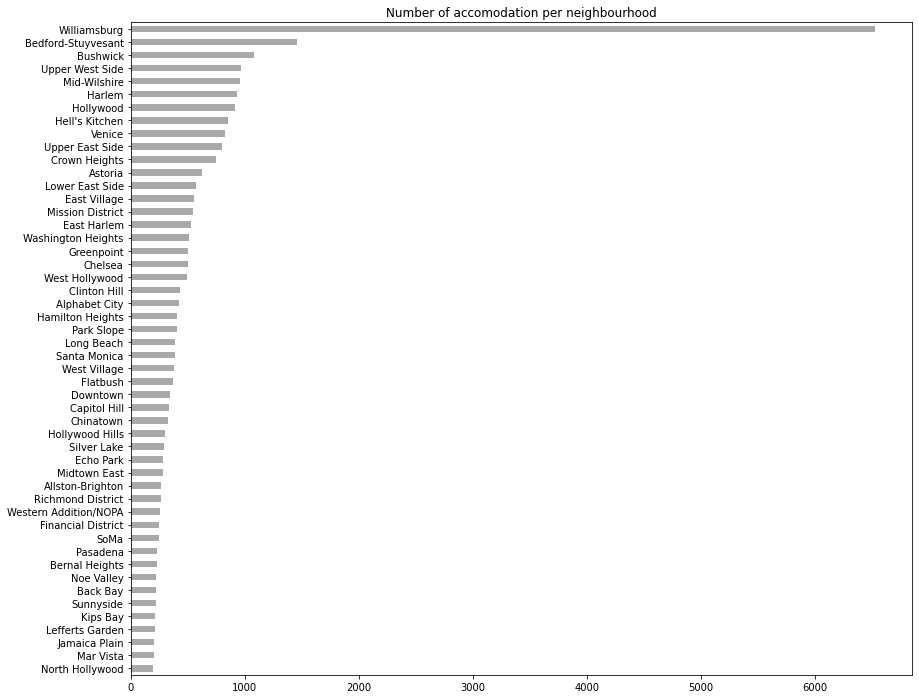

In [93]:
df_train['neighbourhood'].value_counts().head(50).sort_values().plot(kind='barh', color='darkgrey', figsize=(14,12))
plt.title("Number of accomodation per neighbourhood")

Text(0.5, 1.0, '\nMedian Prices by Neighbourhood\n')

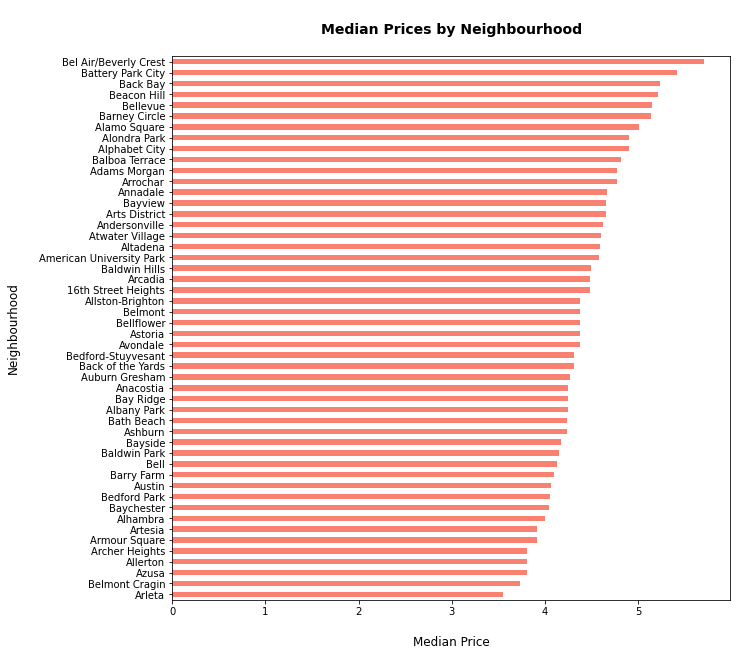

In [94]:
#group_by neighbourhood groups, take the median price and plot it against the neighbourhoods
df_train_neighbourhood_grouped=pd.DataFrame(df_train.groupby(['neighbourhood'])['log_price'].agg(np.median)).head(50)
df_train_neighbourhood_grouped.reset_index(inplace=True)

#plot this
df_train_neighbourhood_grouped.sort_values(by=['log_price'], ascending=True).plot(kind='barh', x='neighbourhood', y='log_price', figsize=(10,10), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('Neighbourhood\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

Text(0.5, 0.98, '')

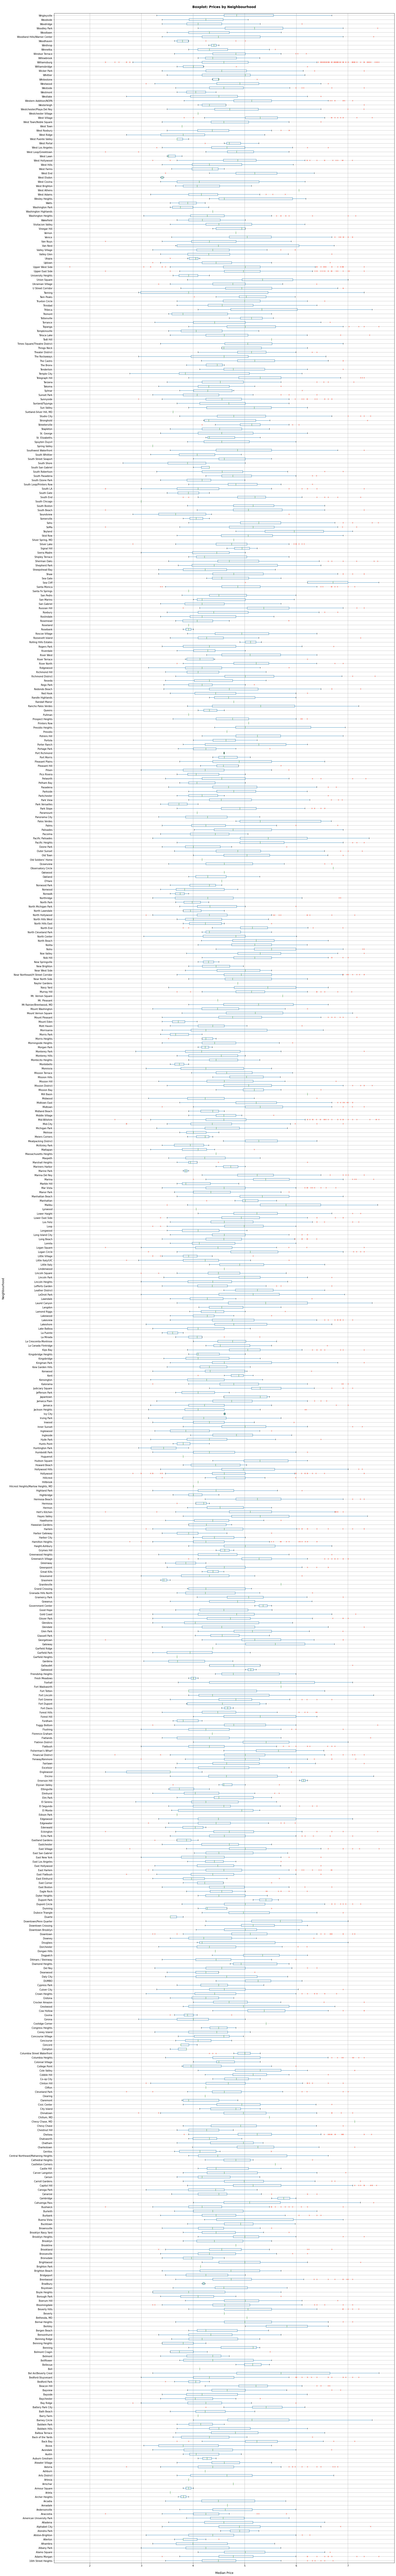

In [95]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

df_train.boxplot(column='log_price', by='neighbourhood', 
           flierprops=red_square, vert=False, figsize=(25,200))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('Neighbourhood\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('')

In [96]:
#because of the large number of neighbourhood and lack of any significant conclusive relation with price. dropping neighbourhood column

df_train.drop('neighbourhood', axis=1, inplace=True)

In [97]:
df_test.drop('neighbourhood', axis=1, inplace=True)

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 6901257 to 10519192
Data columns (total 85 columns):
room_type                                     49999 non-null int32
accommodates                                  49999 non-null int64
bathrooms                                     49999 non-null float64
bed_type                                      49999 non-null int32
cancellation_policy                           49999 non-null int32
cleaning_fee                                  49999 non-null int32
description                                   49999 non-null object
host_identity_verified                        49999 non-null int64
host_response_rate                            49999 non-null int32
instant_bookable                              49999 non-null int64
review_scores_rating                          49999 non-null float64
bedrooms                                      49999 non-null float64
beds                                          49999 non-null float64
lo

In [99]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24111 entries, 5979389 to 3534845
Data columns (total 82 columns):
room_type                                     24111 non-null int32
accommodates                                  24111 non-null int64
bathrooms                                     24111 non-null float64
bed_type                                      24111 non-null int32
cancellation_policy                           24111 non-null int32
cleaning_fee                                  24111 non-null int32
description                                   24111 non-null object
host_identity_verified                        24111 non-null int64
host_response_rate                            24111 non-null int32
instant_bookable                              24111 non-null int64
review_scores_rating                          24111 non-null float64
bedrooms                                      24111 non-null float64
beds                                          24111 non-null float64
pro

### Preprocessing of description column

Lets extract the following to get some valuable informaation from the column 
1.all double-digit or three-digit numbers
2.that are followed by one of the two characters "s" or "m" (covering "sqm", "square meters", "m2" etc.) and
3.may or may not be connected by white space.
4.Single- or more than three-digit numbers for accommodation sizes are quite unlikely.

In [100]:
#extract numbers
df_train['size']=df_train['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
df_train['size']=df_train['size'].str.replace("\D","")

#Change datatype of size into float
df_train['size']=df_train['size'].astype(float)

print("NaNs in size column absolute: ", df_train['size'].isna().sum())
print('NaNs in size_column in percentage:', round(df_train['size'].isna().sum()/len(df_train),3), '%')

NaNs in size column absolute:  32666
NaNs in size_column in percentage: 0.653 %


In [101]:
#extract numbers for test dataset
df_test['size']=df_test['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
df_test['size']=df_test['size'].str.replace("\D","")

#Change datatype of size into float
df_test['size']=df_test['size'].astype(float)

print("NaNs in size column absolute: ", df_test['size'].isna().sum())
print('NaNs in size_column in percentage:', round(df_test['size'].isna().sum()/len(df_test),3), '%')

NaNs in size column absolute:  15740
NaNs in size_column in percentage: 0.653 %


In [102]:
df_train[['description','size']].head(10)

,description,size
id,,
6901257,"Beautiful, sunlit brownstone 1-bedroom in the ...",NaN
6304928,Enjoy travelling during your stay in Manhattan...,NaN
7919400,The Oasis comes complete with a full backyard ...,NaN
13418779,This light-filled home-away-from-home is super...,15.0
3808709,"Cool, cozy, and comfortable studio located in ...",10.0
12422935,Beautiful private room overlooking scenic view...,NaN
11825529,Warm and cozy studio with full kitchen and bat...,NaN
13971273,Arguably the best location (and safest) in dow...,NaN
180792,Garden Studio with private entrance from the s...,NaN


In [103]:
df_test[['description','size']].head(10)

,description,size
id,,
5979389,2 bedroom apartment 3 blocks away from the Dek...,15.0
13488121,This 2015 renovation was done with an eye to b...,NaN
8121643,Apt features shared living room w/ Apple TV. ...,NaN
16490010,Our home is equidistance to the L and G trains...,NaN
16274069,JUST 20 MINUTES BY TRAIN TO MANHATTAN - AFFORD...,20.0
6421468,Special Room for Raquel Only *Classic Interior...,NaN
14692747,Your beautiful room is the master bedroom of t...,30.0
6705158,"Nice, Cozy and Quiet 2 Bedrooms FURNISHED apar...",NaN
13016389,Hi there! I have a great studio in the heart ...,NaN


In [104]:
#drop description column from training dataset
df_train=df_train.drop(['description'], axis=1)

In [105]:
#drop description column from test dataset
df_test=df_test.drop(['description'], axis=1)

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 6901257 to 10519192
Data columns (total 85 columns):
room_type                                     49999 non-null int32
accommodates                                  49999 non-null int64
bathrooms                                     49999 non-null float64
bed_type                                      49999 non-null int32
cancellation_policy                           49999 non-null int32
cleaning_fee                                  49999 non-null int32
host_identity_verified                        49999 non-null int64
host_response_rate                            49999 non-null int32
instant_bookable                              49999 non-null int64
review_scores_rating                          49999 non-null float64
bedrooms                                      49999 non-null float64
beds                                          49999 non-null float64
log_price                                     49999 non-null float64
p

In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24111 entries, 5979389 to 3534845
Data columns (total 82 columns):
room_type                                     24111 non-null int32
accommodates                                  24111 non-null int64
bathrooms                                     24111 non-null float64
bed_type                                      24111 non-null int32
cancellation_policy                           24111 non-null int32
cleaning_fee                                  24111 non-null int32
host_identity_verified                        24111 non-null int64
host_response_rate                            24111 non-null int32
instant_bookable                              24111 non-null int64
review_scores_rating                          24111 non-null float64
bedrooms                                      24111 non-null float64
beds                                          24111 non-null float64
property_type_Apartment                       24111 non-null uint8
prop

In [108]:
df_train.isna().sum()

room_type                                         0
accommodates                                      0
bathrooms                                         0
bed_type                                          0
cancellation_policy                               0
cleaning_fee                                      0
host_identity_verified                            0
host_response_rate                                0
instant_bookable                                  0
review_scores_rating                              0
bedrooms                                          0
beds                                              0
log_price                                         0
property_type_Apartment                           0
property_type_Bed & Breakfast                     0
property_type_Boat                                0
property_type_Boutique hotel                      0
property_type_Bungalow                            0
property_type_Cabin                               0
property_typ

In [109]:
df_test.isna().sum()

room_type                                         0
accommodates                                      0
bathrooms                                         0
bed_type                                          0
cancellation_policy                               0
cleaning_fee                                      0
host_identity_verified                            0
host_response_rate                                0
instant_bookable                                  0
review_scores_rating                              0
bedrooms                                          0
beds                                              0
property_type_Apartment                           0
property_type_Bed & Breakfast                     0
property_type_Boat                                0
property_type_Boutique hotel                      0
property_type_Bungalow                            0
property_type_Cabin                               0
property_type_Camper/RV                           0
property_typ

As calculated further up, more than half of our records still don't have a size. That means we have a problem! Dropping these records isn't an option as we would loose too much valuable information. Simply replacing it with the mean or median makes no sense. That leaves a third option: predict the missing value with a Machine Learning Algorithm. To not make it too complicated, we'll only use numerical features. Next, we have to split our data into

#### a) a training set where we have sizes and
#### b) a test set where we don't.

In [110]:
# assigning the clean df_train to sub_df_train to work with to find out the value for vacant instances of "size" column
sub_df_train = df_train

In [111]:
# assigning the clean df_test to sub_df_test to work with to find out the value for vacant instances of "size" column
sub_df_test=df_test

In [112]:
#split datasets (df_train)
train_data_size=sub_df_train[sub_df_train['size'].notnull()]
test_data_size=sub_df_train[sub_df_train['size'].isnull()]

#define X
X_train_size=train_data_size.drop(['size'], axis=1)
X_test_size=test_data_size.drop(['size'], axis=1)

#define y
y_train_size=train_data_size['size']

In [113]:
print("Shape of Training Data:", train_data_size.shape)
print("Shape of Test Data:    ",test_data_size.shape)
print("\nShape of X_train:", X_train_size.shape)
print("Shape of X_test:", X_test_size.shape)
print("\nShape of y_train:", y_train_size.shape)

Shape of Training Data: (17333, 85)
Shape of Test Data:     (32666, 85)

Shape of X_train: (17333, 84)
Shape of X_test: (32666, 84)

Shape of y_train: (17333,)


In [114]:
#split datasets (df_test)
train_data_size_for_test=sub_df_test[sub_df_test['size'].notnull()]
test_data_size_for_test=sub_df_test[sub_df_test['size'].isnull()]

#define X
X_train_size_for_test=train_data_size_for_test.drop(['size'], axis=1)
X_test_size_for_test=test_data_size_for_test.drop(['size'], axis=1)

#define y
y_train_size_for_test=train_data_size_for_test['size']

In [115]:
print("Shape of Training Data for test data:", train_data_size_for_test.shape)
print("Shape of Test Data for test data:    ",test_data_size_for_test.shape)
print("\nShape of X_train (for test data):", X_train_size_for_test.shape)
print("Shape of X_test (for test data):", X_test_size_for_test.shape)
print("\nShape of y_train (for test data):", y_train_size_for_test.shape)

Shape of Training Data for test data: (8371, 82)
Shape of Test Data for test data:     (15740, 82)

Shape of X_train (for test data): (8371, 81)
Shape of X_test (for test data): (15740, 81)

Shape of y_train (for test data): (8371,)


In [116]:
#import Linear Regression module
from sklearn.linear_model import LinearRegression

In [117]:
X_train_size.max().sort_values()

property_type_Parking Space                     0.000000
property_type_Casa particular                   0.000000
property_type_Lighthouse                        0.000000
property_type_Tipi                              0.000000
Smoke detector                                  1.000000
Essentials                                      1.000000
Heating                                         1.000000
Kitchen                                         1.000000
Wireless Internet                               1.000000
property_type_Villa                             1.000000
Air conditioning                                1.000000
property_type_Vacation home                     1.000000
property_type_Treehouse                         1.000000
property_type_Train                             1.000000
city_SF                                         1.000000
property_type_Timeshare                         1.000000
property_type_Yurt                              1.000000
property_type_Tent             

In [130]:
#instantiate
linreg=LinearRegression()

#fit model to training data
linreg.fit(X_train_size, y_train_size)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
#making predictions
y_test_size=linreg.predict(X_test_size)

In [133]:
#Now that we have predicted the missing sizes, lets put y_test_size into a dataframe with a column "size"
y_test_size=pd.DataFrame(y_test_size)
y_test_size.columns=['size']
print(y_test_size.shape)
y_test_size.head()

(32666, 1)


,size
0,107.950726
1,73.065303
2,118.702187
3,126.277121
4,111.120236


In [134]:
#instantiate
linreg_test=LinearRegression()

#fit model to training data
linreg_test.fit(X_train_size_for_test, y_train_size_for_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
#making predictions for test data
y_test_size_for_test=linreg_test.predict(X_test_size_for_test)

In [136]:
#Now that we have predicted the missing sizes, lets put y_test_size_for_test into a dataframe with a column "size"
y_test_size_for_test=pd.DataFrame(y_test_size_for_test)
y_test_size_for_test.columns=['size']
print(y_test_size_for_test.shape)
y_test_size_for_test.head()

(15740, 1)


,size
0,212.175511
1,93.757802
2,28.080386
3,53.846807
4,179.068042


In [137]:
print(X_test_size.shape)
X_test_size.head()

(32666, 84)


,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds,log_price,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,...,Cable TV,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,reviews_per_day
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6901257,0,3,1.0,4,2,1,1,100,0,100.0,1.0,1.0,5.010635,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.065
6304928,0,7,1.0,4,2,1,0,100,1,93.0,3.0,3.0,5.129899,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.120
7919400,0,5,1.0,4,1,1,1,100,1,92.0,1.0,3.0,4.976734,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.072
12422935,1,2,1.0,4,2,1,1,100,1,100.0,1.0,1.0,4.442651,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.300
11825529,0,3,1.0,4,1,1,0,100,1,97.0,1.0,1.0,4.418841,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.349


In [138]:
print(X_test_size_for_test.shape)
X_test_size_for_test.head()

(15740, 81)


,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,...,Cable TV,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,reviews_per_day
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13488121,0,4,1.0,4,1,1,1,1,0,100.0,1.0,1.0,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.046
8121643,1,2,1.0,4,0,0,0,1,0,96.0,1.0,1.0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0.000
16490010,1,2,1.0,4,0,1,1,1,0,98.0,1.0,1.0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0.033
6421468,1,1,1.0,4,0,0,1,0,0,100.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.000
6705158,0,6,2.0,4,2,1,1,1,1,95.0,2.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.081


In [139]:
#To combine y_test_size and X_test_size back to our full test_dataframe, we have to create a bit of a circuit. As we can see here, the X_test_size dataframe has a specific index that's not compatible with y_test_size, where the numbers simply start from 0 onwards. So we need to provide y_test_size with the X_test_size index to make sure everyting fits together.
#make the index of X_test_size to an own dataframe

prelim_index=pd.DataFrame(X_test_size.index)
prelim_index.columns=['prelim']

prelim_index.head()

,prelim
0,6901257
1,6304928
2,7919400
3,12422935
4,11825529


In [140]:
#Concatenating y_test_size_for_test and X_test_size_for_test back to our full test_dataframe
#make the index of X_test_size_for_test to an own dataframe

prelim_index_for_test=pd.DataFrame(X_test_size_for_test.index)
prelim_index_for_test.columns=['prelim_for_test']

prelim_index_for_test.head()

,prelim_for_test
0,13488121
1,8121643
2,16490010
3,6421468
4,6705158


In [141]:
#concat this dataframe with y_test_size
y_test_size=pd.concat([y_test_size, prelim_index], axis=1)
y_test_size.set_index(['prelim'], inplace=True)
y_test_size.head()

,size
prelim,
6901257,107.950726
6304928,73.065303
7919400,118.702187
12422935,126.277121
11825529,111.120236


In [142]:
#concat this dataframe with y_test_size_for_test
y_test_size_for_test=pd.concat([y_test_size_for_test, prelim_index_for_test], axis=1)
y_test_size_for_test.set_index(['prelim_for_test'], inplace=True)
y_test_size_for_test.head()

,size
prelim_for_test,
13488121,212.175511
8121643,93.757802
16490010,28.080386
6421468,53.846807
6705158,179.068042


In [143]:
#Concatinating the X_test_size dataframe with y_test_size to get a new_test_size_data dataframe
new_test_size_data=pd.concat([X_test_size, y_test_size], axis=1)
new_test_size_data.head()
#print(new_test_size_data.shape)

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds,log_price,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,...,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,reviews_per_day,size
6901257,0,3,1.0,4,2,1,1,100,0,100.0,1.0,1.0,5.010635,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.065,107.950726
6304928,0,7,1.0,4,2,1,0,100,1,93.0,3.0,3.0,5.129899,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.120,73.065303
7919400,0,5,1.0,4,1,1,1,100,1,92.0,1.0,3.0,4.976734,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.072,118.702187
12422935,1,2,1.0,4,2,1,1,100,1,100.0,1.0,1.0,4.442651,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.300,126.277121
11825529,0,3,1.0,4,1,1,0,100,1,97.0,1.0,1.0,4.418841,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.349,111.120236


In [144]:
#Concatinating the X_test_size_for_test dataframe with y_test_size_for_test to get a new_test_size_data_for_test dataframe
new_test_size_data_for_test=pd.concat([X_test_size_for_test, y_test_size_for_test], axis=1)
new_test_size_data_for_test.head()

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,...,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,reviews_per_day,size
13488121,0,4,1.0,4,1,1,1,1,0,100.0,1.0,1.0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.046,212.175511
8121643,1,2,1.0,4,0,0,0,1,0,96.0,1.0,1.0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0.000,93.757802
16490010,1,2,1.0,4,0,1,1,1,0,98.0,1.0,1.0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0.033,28.080386
6421468,1,1,1.0,4,0,0,1,0,0,100.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.000,53.846807
6705158,0,6,2.0,4,2,1,1,1,1,95.0,2.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.081,179.068042


In [145]:
new_test_size_data['size'].isna().sum()

0

In [146]:
new_test_size_data_for_test['size'].isna().sum()

0

In [147]:
#train_data_size
#new_test_size_data
#combine train_data_size and new_test_size_data along the rows back to a new_sub_df
new_sub_df_train=pd.concat([train_data_size, new_test_size_data], axis=0)
print(new_sub_df_train.shape)
new_sub_df_train.head()

(49999, 85)


,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds,log_price,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,...,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,reviews_per_day,size
13418779,0,4,1.0,4,0,1,1,100,0,96.0,2.0,2.0,6.620073,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.000,15.0
3808709,0,2,1.0,4,1,1,1,100,1,40.0,0.0,1.0,4.744932,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.006,10.0
5578513,1,2,1.0,4,2,1,1,100,0,93.0,1.0,1.0,4.605170,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.063,10.0
17423675,0,4,1.5,4,2,1,1,100,0,97.0,2.0,2.0,5.010635,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.057,44.0
2658946,0,6,1.5,4,2,1,1,100,1,89.0,2.0,3.0,5.298317,1,0,0,0,...,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0.181,30.0


In [148]:
#new_test_size_data_for_test
#train_data_size_for_test
#combine train_data_size_for_test and new_test_size_data_for_test along the rows back to a new_sub_df_test
new_sub_df_test=pd.concat([train_data_size_for_test, new_test_size_data_for_test], axis=0)
print(new_sub_df_test.shape)
new_sub_df_test.head()

(24111, 82)


,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,...,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,reviews_per_day,size
5979389,1,2,1.0,4,2,1,1,1,0,96.0,1.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.000,15.0
16274069,0,4,1.0,4,1,1,0,1,0,92.0,2.0,3.0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.013,20.0
14692747,1,2,1.0,4,2,1,1,1,0,94.0,1.0,1.0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0.045,30.0
20468187,1,2,1.0,4,0,0,1,1,0,96.0,1.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0.000,15.0
13088369,0,4,1.0,4,1,0,1,1,0,100.0,2.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.176,24.0


In [149]:
new_sub_df_train.columns

Index(['room_type', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'host_identity_verified',
       'host_response_rate', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'log_price', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Casa particular', 'property_type_Castle',
       'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Lighthouse', 'property_type_Loft', 'property_type_Other',
       'property_type_Parking Space', 'property_type_Serviced apartment',
       'propert

In [153]:
df_train_cleaned=new_sub_df_train
df_test_cleaned=new_sub_df_test

In [151]:
df_train_cleaned.head()

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds,log_price,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,...,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,reviews_per_day,size
13418779,0,4,1.0,4,0,1,1,100,0,96.0,2.0,2.0,6.620073,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.000,15.0
3808709,0,2,1.0,4,1,1,1,100,1,40.0,0.0,1.0,4.744932,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.006,10.0
5578513,1,2,1.0,4,2,1,1,100,0,93.0,1.0,1.0,4.605170,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.063,10.0
17423675,0,4,1.5,4,2,1,1,100,0,97.0,2.0,2.0,5.010635,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.057,44.0
2658946,0,6,1.5,4,2,1,1,100,1,89.0,2.0,3.0,5.298317,1,0,0,0,...,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0.181,30.0


In [154]:
df_test_cleaned.head()

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,...,Free parking on premises,translation missing: en.hosting_amenity_49,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,reviews_per_day,size
5979389,1,2,1.0,4,2,1,1,1,0,96.0,1.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.000,15.0
16274069,0,4,1.0,4,1,1,0,1,0,92.0,2.0,3.0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.013,20.0
14692747,1,2,1.0,4,2,1,1,1,0,94.0,1.0,1.0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0.045,30.0
20468187,1,2,1.0,4,0,0,1,1,0,96.0,1.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0.000,15.0
13088369,0,4,1.0,4,1,0,1,1,0,100.0,2.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.176,24.0


In [152]:
#investigating the newly added column "size" thoroughly
df_train_cleaned["size"].describe()

count    49999.000000
mean       121.134651
std        148.350645
min       -203.488639
25%         20.000000
50%         95.273986
75%        160.617563
max        999.000000
Name: size, dtype: float64

In [155]:
#investigating the newly added column "size" thoroughly
df_test_cleaned["size"].describe()

count    24111.000000
mean       118.087135
std        148.420387
min       -108.271934
25%         20.000000
50%         91.565433
75%        159.124672
max        991.000000
Name: size, dtype: float64

<AxesSubplot:>

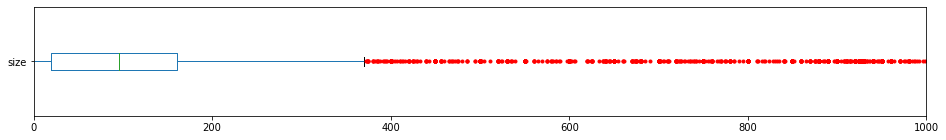

In [156]:
#for df_train_cleaned dataframe
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df_train_cleaned['size'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2))

<AxesSubplot:>

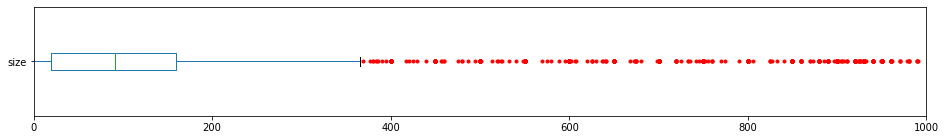

In [157]:
#for df_test_cleaned dataframe
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df_test_cleaned['size'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2))

In [ ]:
#To be on the safe side, let’s remove all outliers over 300 square meters, and all those with 0 or less than 0
df_train_cleaned.drop(df_train_cleaned[(df_train_cleaned['size']==0) | (df_train_cleaned['size']<0) | (df_train_cleaned['size'] > 300)].index, axis=0, inplace=True)

In [159]:
print("The dataset has {} rows and {} columns - after being engineered.".format(*df_train_cleaned.shape))

The dataset has 49999 rows and 85 columns - after being engineered.


In [158]:
#To be on the safe side, let’s remove all outliers over 300 square meters, and all those with 0 or less than 0
df_test_cleaned.drop(df_test_cleaned[(df_test_cleaned['size']==0) | (df_test_cleaned['size']<0) | (df_test_cleaned['size'] > 300)].index, axis=0, inplace=True)

In [160]:
print("The dataset has {} rows and {} columns - after being engineered.".format(*df_test_cleaned.shape))

The dataset has 22202 rows and 82 columns - after being engineered.


In [161]:
#figuring out the name of the columns that are not present in df_test_cleaned dataframe when compared against columns present in df_train_cleaned dataframe
set(df_train_cleaned.columns) - set(df_test_cleaned.columns)

{'log_price',
 'property_type_Casa particular',
 'property_type_Lighthouse',
 'property_type_Parking Space'}

In [163]:
#adding 'property_type_Casa particular','property_type_Lighthouse','property_type_Parking Space' columns to df_test_cleaned dataframe to have equal number of columns with that of df_train_cleaned
df_test_cleaned['property_type_Casa particular']=0
df_test_cleaned['property_type_Lighthouse']=0
df_test_cleaned['property_type_Parking Space']=0

In [164]:
df_test_cleaned.head()

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,...,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,reviews_per_day,size,property_type_Casa particular,property_type_Lighthouse,property_type_Parking Space
5979389,1,2,1.0,4,2,1,1,1,0,96.0,1.0,1.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0.000,15.0,0,0,0
16274069,0,4,1.0,4,1,1,0,1,0,92.0,2.0,3.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0.013,20.0,0,0,0
14692747,1,2,1.0,4,2,1,1,1,0,94.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0.045,30.0,0,0,0
20468187,1,2,1.0,4,0,0,1,1,0,96.0,1.0,1.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0.000,15.0,0,0,0
13088369,0,4,1.0,4,1,0,1,1,0,100.0,2.0,3.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0.176,24.0,0,0,0


In [165]:
set(df_test_cleaned.columns) - set(df_train_cleaned.columns)

{'property_type_Island'}

In [168]:
df_test_cleaned=df_test_cleaned.drop(['property_type_Island'], axis=1)

In [169]:
df_test_cleaned.head()

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,...,Lock on bedroom door,Buzzer/wireless intercom,Safety card,Self Check-In,Elevator,Pets allowed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,reviews_per_day,size,property_type_Casa particular,property_type_Lighthouse,property_type_Parking Space
5979389,1,2,1.0,4,2,1,1,1,0,96.0,1.0,1.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0.000,15.0,0,0,0
16274069,0,4,1.0,4,1,1,0,1,0,92.0,2.0,3.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0.013,20.0,0,0,0
14692747,1,2,1.0,4,2,1,1,1,0,94.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0.045,30.0,0,0,0
20468187,1,2,1.0,4,0,0,1,1,0,96.0,1.0,1.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0.000,15.0,0,0,0
13088369,0,4,1.0,4,1,0,1,1,0,100.0,2.0,3.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0.176,24.0,0,0,0


In [177]:
#dropping "log_price" column from "df_train_cleaned" and keeping the modified dataframe in df_train_cleaned_mod" dataframe
df_train_cleaned_mod=df_train_cleaned.drop(['log_price'], axis=1)

In [178]:
#to maintain the same order of the features
df_train_cleaned_cols_list=list(df_train_cleaned_mod.columns)
df_train_cleaned_cols_list.sort()
df_test_cleaned=df_test_cleaned[df_train_cleaned_cols_list]

In [185]:
#check whether the sequence of columns is same for both the dataframes
df_train_cleaned_mod.columns==df_test_cleaned.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## Modeliing the data

In [186]:
#define our target
target=df_train_cleaned["log_price"]
#define our features
features=df_train_cleaned.drop(['log_price'], axis=1)

### splitting and scaling the data

In [187]:
#import train_test_split
from sklearn.model_selection import train_test_split
#import metrices
from sklearn.metrics import mean_squared_error, r2_score

In [189]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [190]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39999, 84)
(39999,)
(10000, 84)
(10000,)


In [191]:
#scale data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [192]:
import xgboost as xgb
model_xgb=xgb.XGBRegressor()

### Some of the important hyperparameters to tune an XGBoost are:

#### n_estimators = Number of trees one wants to build.
#### learning_rate = Rate at which our model learns patterns in data. After every round, it shrinks the feature weights to reach the best optimum.
#### max_depth  = Determines how deeply each tree is allowed to grow during any boosting round.
#### colsample_bytree = Percentage of features used per tree.
#### gamma   = Specifies the minimum loss reduction required to make a split.

In [ ]:
from sklearn.model_selection import GridSearchCV
# create Grid
#param_grid = {'n_estimators': [100, 150, 200],
#              'learning_rate': [0.01, 0.05, 0.1], 
#              'max_depth': [3, 4, 5, 6, 7],
#              'colsample_bytree': [0.6, 0.7, 1],
#              'gamma': [0.0, 0.1, 0.2]}

#instantiate and tuned xgb
#xgb_grid_search=GridSearchCV(xgb, param_grid, cv=3, n_jobs=-1)

In [ ]:
# fit the data into the model
#xgb_grid_search.fit(X_train, y_train, verbose=3)

# print best estimator parameters found during the grid search
#print(xgb_grid_search.best_params_)

In [193]:
# Best values for the parameters obtained as {'colsample_bytree': 1, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
# instantiate xgboost with best parameters
model_xgb = xgb.XGBRegressor(colsample_bytree=1, gamma=0.1, learning_rate=0.1, 
                           max_depth=7, n_estimators=200, random_state=4)

In [194]:
# train the model once more with the tuned hyperparameter
model_xgb.fit(X_train, y_train)

# predict the outcome
y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)

c:\users\krish\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [195]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 4)}")

RMSE: 0.3368


In [196]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 4)}")

r2: 0.785


### Cross validation

In order to build more robust models, it is common to conduct a k-fold cross validation where all the entries in the original training dataset are used for both training and validation. XGBoost supports k-fold cross validation via the cv method. All we have to do is specify the nfolds parameter, which is the number of cross validation rounds you want to build.

Also, it supports many other parameters:

#### num_boost_round    = Specifies the number of trees to build (analogous to n_estimators).
#### metrics    = Specifies the evaluation metrics to be checked during CV.
#### as_pandas   = Returns the results in a decent pandas DataFrame.
#### early_stopping_rounds = Finishes model training early if the hold-out metric does not improve for a given number of rounds.

We will have to first convert the dataset into an optimized data structure called DMatrix so that XGBoost's cross validation method is supported.

In [197]:
xgb_train=xgb.DMatrix(data=X_train, label=y_train)

In [198]:
params = {'colsample_bytree':1, 'gamma':0.1, 'learning_rate':0.01, 'max_depth':7}

cv_results = xgb.cv(dtrain=xgb_train, params=params, nfold=3,
                    num_boost_round=200, early_stopping_rounds=10, 
                    metrics="rmse", as_pandas=True)

In [199]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.298321,0.003741,4.298322,0.007452
1,4.255857,0.003706,4.255869,0.007339
2,4.213824,0.003668,4.213847,0.007224
3,4.172213,0.003633,4.172250,0.007115
4,4.131023,0.003597,4.131071,0.007004


In [200]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
195,0.720518,0.000918,0.730284,0.002127
196,0.715293,0.000912,0.725178,0.002153
197,0.710125,0.000934,0.720130,0.002164
198,0.705028,0.000944,0.715161,0.002159
199,0.699979,0.000952,0.710239,0.002181


Text(0.5, 0, 'Relative Feature Importance with XGBoost')

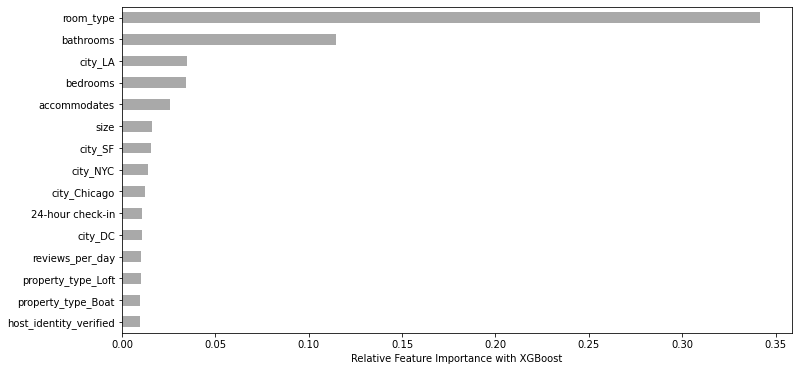

In [201]:
# plot the important features
feat_importances = pd.Series(model_xgb.feature_importances_, index=features.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(12,6))
plt.xlabel('Relative Feature Importance with XGBoost')

In [219]:
#defining a function to get the predictions for unknown target variables
def solution_airbnb(model, output_filename, df_test_cleaned=[], test_data=[]):
    model.fit(X_train,y_train)
    pred=model.predict(df_test_cleaned)
    output=pd.DataFrame([test_data.id,pred]).transpose()
    output.columns=['id','log_price']
    output.to_csv(output_filename, index=None)
    return output

In [220]:
#applying the solution to the test dataset shared and storing the output in dedicated file
solution_airbnb(model_xgb, 'output_airbnb_xgb.csv', df_test_cleaned, test_data)

c:\users\krish\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,id,log_price
0,5979389.0,4.959660
1,13488121.0,4.960624
2,8121643.0,5.839746
3,16490010.0,5.154269
4,16274069.0,4.501178
5,6421468.0,6.201945
6,14692747.0,4.937616
7,6705158.0,5.906679
8,13016389.0,6.210273
9,18497489.0,4.752433


In [216]:
output=pd.DataFrame(model_xgb.predict(df_test_cleaned))

c:\users\krish\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [218]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22202 entries, 0 to 22201
Data columns (total 1 columns):
0    22202 non-null float32
dtypes: float32(1)
memory usage: 86.8 KB


In [ ]:
pd.concat(df_test)